# Aprendizado: definindo a velocidade de aprendizado 

## O objetivo é verificar o efeito que a taxa de aprendizado no desempenho do modelo durante o aprendizado e dicas sobre como configurá-la 

## Importanto as bibliotecas

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import math
import tensorflow as tf

## Criando o conjunto de treino e teste

In [2]:
def create_dataset():
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    y_categorical = to_categorical(y)
    
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = create_dataset()

## Variando a taxa de aprendizado

In [4]:
def model_training(lrate, X_train, y_train, X_test, y_test):

    n_input, n_output = X_train.shape[1], y_train.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(50, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_output, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
    
    return model, history

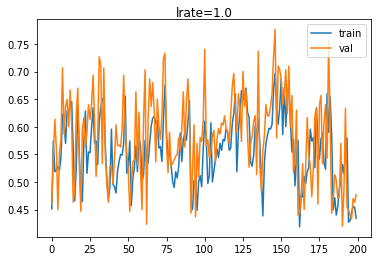

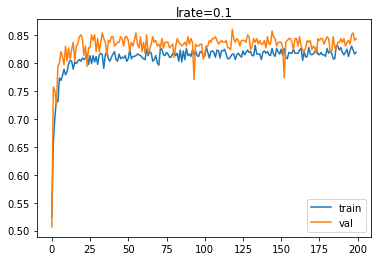

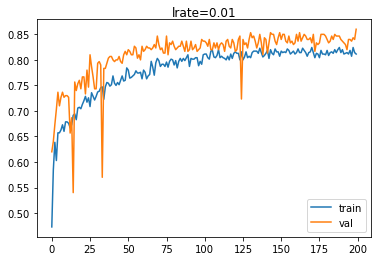

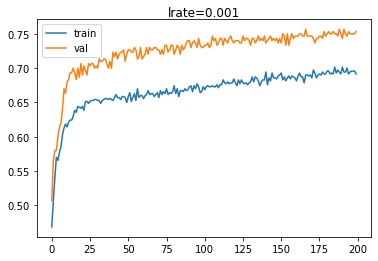

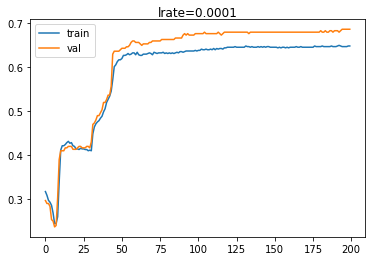

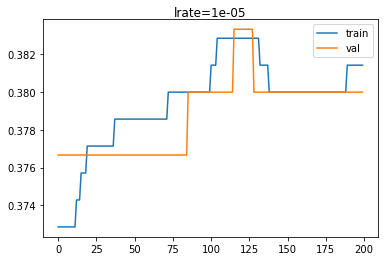

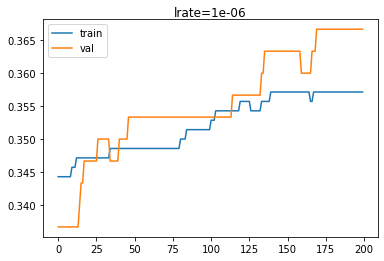

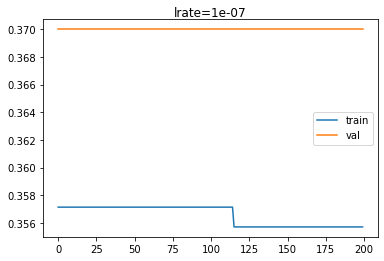

In [5]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

for i in range(len(learning_rates)):

    model, history = model_training(learning_rates[i], X_train, y_train, X_test, y_test)

    # plotando as curvas de aprendizado
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('lrate='+str(learning_rates[i]), pad=-80)
    plt.legend()
    plt.show()

## Momentum

<img src="https://miro.medium.com/max/640/1*i1Qc2E0TVlPHEKG7LepXgA.gif">

In [15]:
def model_training(momentum, X_train, y_train, X_test, y_test):

    n_input, n_output = X_train.shape[1], y_train.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(50, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_output, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
    
    return model, history

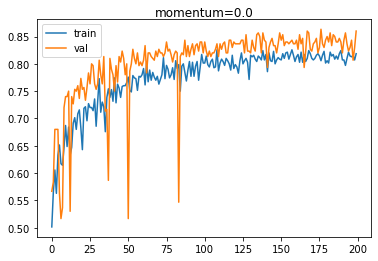

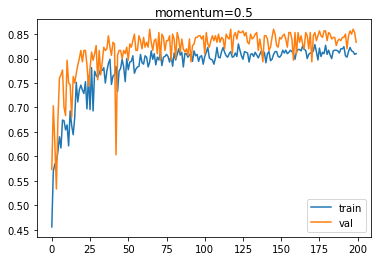

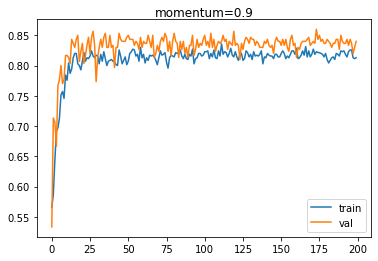

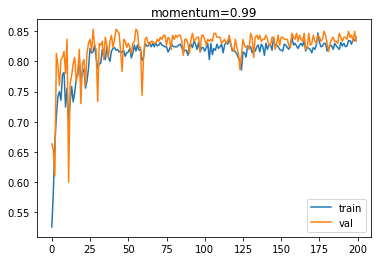

In [16]:
momentums = [0.0, 0.5, 0.9, 0.99]

for i in range(len(momentums)):

    model, history = model_training(momentums[i], X_train, y_train, X_test, y_test)

    # plotando as curvas de aprendizado
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('momentum='+str(momentums[i]), pad=-80)
    plt.legend()
    plt.show()

## Taxa de decaimento

sum_of_gradient = gradient + previous_sum_of_gradient * decay_rate 

delta = -learning_rate * sum_of_gradient 

<img src="https://miro.medium.com/max/800/1*zVi4ayX9u0MQQwa90CnxVg.gif"> 

## Taxa de aprendizado variável

In [40]:
#Decaimento no tempo
epochs=5
decay= 0.01
lr0 = 0.9
lr=0
for epoch in range(epochs):
    lr = (1 / (1 + decay * epoch))*lr0
    print(lr)

0.9
0.8910891089108911
0.8823529411764706
0.8737864077669903
0.8653846153846153


In [43]:
#Decaimento exponencial
epochs=5
decay= 0.01
decay_rate=0.01
lr0 = 0.9
lr=0
for epoch in range(epochs):
    lr = lr0 * math.exp(-decay_rate*epoch)
    print(lr)

0.9
0.8910448503742513
0.8821788059760798
0.8734009801936573
0.8647104952370909


In [47]:
#Decaimento polinomial
epochs=20
lr0 = 0.9
lrf = 0.01
decay_steps = 100
lr=0
for epoch in range(epochs):
    epoch = min(epoch, decay_steps)
    lr = ((lr0 - lrf) * math.sqrt(1 - epoch / decay_steps)**2) + lrf
    print(lr)

0.9
0.8911
0.8822000000000001
0.8733
0.8644
0.8554999999999999
0.8466
0.8377
0.8288000000000001
0.8199000000000001
0.8109999999999999
0.8021
0.7932000000000001
0.7842999999999999
0.7754
0.7665000000000001
0.7575999999999999
0.7487
0.7398000000000001
0.7309000000000001


## Testar diferentes taxas de decaimento com schedules

In [11]:
def model_training(decay, X_train, y_train, X_test, y_test):

    n_input, n_output = X_train.shape[1], y_train.shape[1]
    initial_learning_rate = 0.1
    decay_steps = 10000
    
    if(decay == "poly"):
        end_learning_rate = 0.01
        learning_rate = tf.keras.optimizers.schedules.PolynomialDecay(initial_learning_rate, decay_steps, end_learning_rate, power=0.5)
    if(decay == "expo"):
        decay_rate=0.96  
        learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)
    if(decay == "time"):
        decay_steps = 1.0
        decay_rate = 0.5
        learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate, decay_steps, decay_rate)
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(50, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_output, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
    
    return model, history

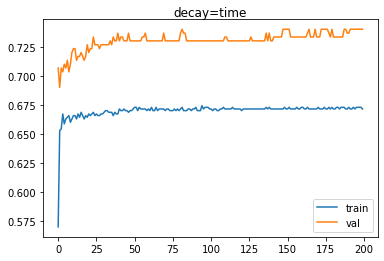

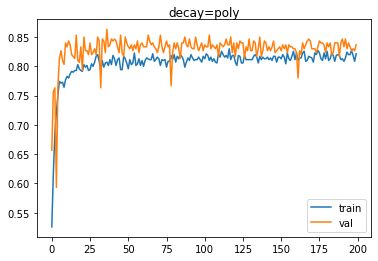

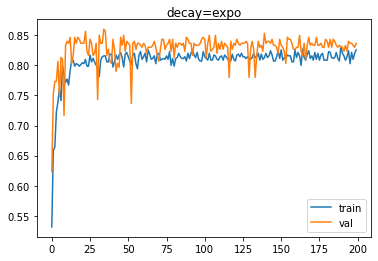

In [12]:
decays = ["time","poly","expo"]

for i in range(len(decays)):

    model, history = model_training(decays[i], X_train, y_train, X_test, y_test)

    # plotando as curvas de aprendizado
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('decay='+str(decays[i]), pad=-80)
    plt.legend()
    plt.show()

## Algoritmos de gradiente descendente adaptativo

<img src="https://miro.medium.com/max/1200/1*_4zyVpZazh4OSIzprmYQEw.gif">

## Treinando o modelo

In [48]:
def model_training(opt, X_train, y_train, X_test, y_test):

    n_input, n_output = X_train.shape[1], y_train.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(50, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_output, activation='softmax'))
    
    # Compilando e treinando o modelo
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
    
    return model, history

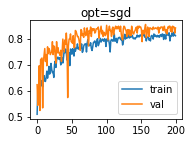

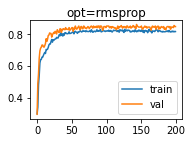

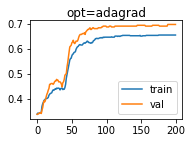

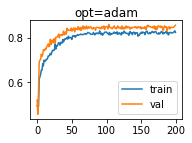

In [49]:
X_train, y_train, X_test, y_test = create_dataset()
opt = ['sgd', 'rmsprop', 'adagrad', 'adam']

for i in range(len(opt)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    model, history = model_training(opt[i], X_train, y_train, X_test, y_test)

    # plotando as curvas de aprendizado
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('opt='+opt[i], pad=-80)
    plt.legend()
    plt.show()